# Libraries

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load & Split Datatset

In [66]:
df = pd.read_csv("/content/df_cleaned.csv")
df

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,...,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc,loan_status
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,...,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816,0
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,...,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631,1
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,...,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297,1
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,...,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711,1
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,...,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119281,36,1.072123,0.066746,-0.629220,-0.261895,0.822982,-0.473196,-0.461473,-0.593052,-0.629167,...,-0.461004,-0.445598,0,0,0.353569,0.720736,-0.931916,0.111700,4.179963,1
119282,26,0.475587,-0.417190,-0.629220,-0.261895,-1.462808,1.079697,0.555059,1.491599,-0.629167,...,0.555735,-0.445598,0,0,-0.727944,0.405263,-0.997673,2.309628,1.390440,0
119283,27,-0.983894,-0.414521,0.132695,-0.261895,1.003439,-0.951061,-1.078993,-0.949884,0.132868,...,-1.078649,-0.445598,0,0,2.336344,-0.109001,0.109992,-0.746028,-1.426978,1
119284,13,0.639197,-0.321768,-0.629220,3.433568,-0.981589,0.636417,1.311917,2.824325,-0.629167,...,1.312745,-0.445598,1,0,-0.259288,-0.484975,-0.158705,-0.049124,0.001258,0


In [67]:
# separate features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [68]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [69]:
def train_logistic_regression_model(
    features,
    labels,
    test_data_ratio=0.2,
    seed=42,
    max_iterations=1000,
    random_state=42,
    **kwargs
):
    """
    Train a logistic regression model with custom settings and evaluate accuracy, confusion matrix, classification report, and ROC curve.

    Parameters:
        features (array-like): Input features (X).
        labels (array-like): Target values (y).
        test_data_ratio (float): Fraction of data for testing (default 0.2).
        seed (int): Random seed for reproducibility (default 42).
        max_iterations (int): Max number of iterations for training (default 1000).
        random_state (int): Random state for train-test split and model initialization.
        **kwargs: Additional hyperparameters for LogisticRegression.

    Returns:
        model: Trained LogisticRegression model.
        accuracy: Accuracy on the test set.
        y_pred: Predicted values on the test set.
    """
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=test_data_ratio, random_state=random_state
    )

    # Initialize and train the logistic regression model
    model = LogisticRegression(max_iter=max_iterations, random_state=random_state, **kwargs)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model performance (accuracy)
    accuracy = accuracy_score(y_test, y_pred)

    # Print Accuracy
    print("Accuracy:", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # ROC Curve
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return model, accuracy, y_pred

Accuracy: 0.964895735093786


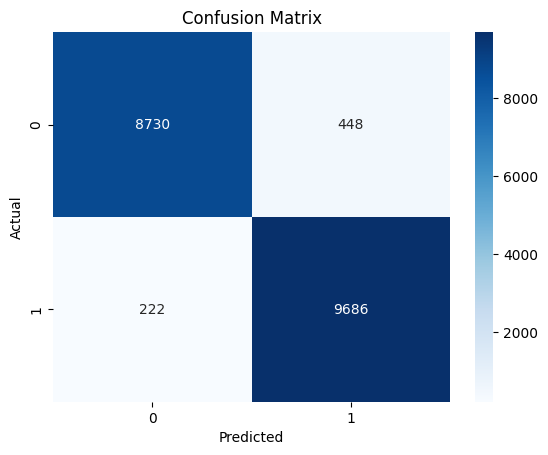

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      9178
           1       0.96      0.98      0.97      9908

    accuracy                           0.96     19086
   macro avg       0.97      0.96      0.96     19086
weighted avg       0.97      0.96      0.96     19086



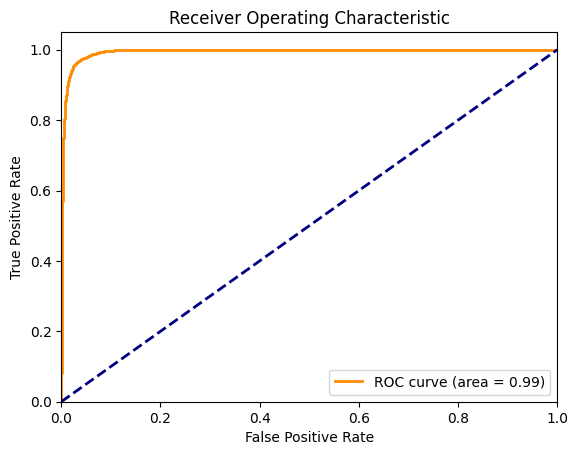

In [70]:
model, accuracy, predictions = train_logistic_regression_model(
    X_train,
    y_train,
    max_iterations=1000,
    random_state=42
)

# performance visualization

## Learning Curve

In [71]:
def plot_learning_curve(estimator, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

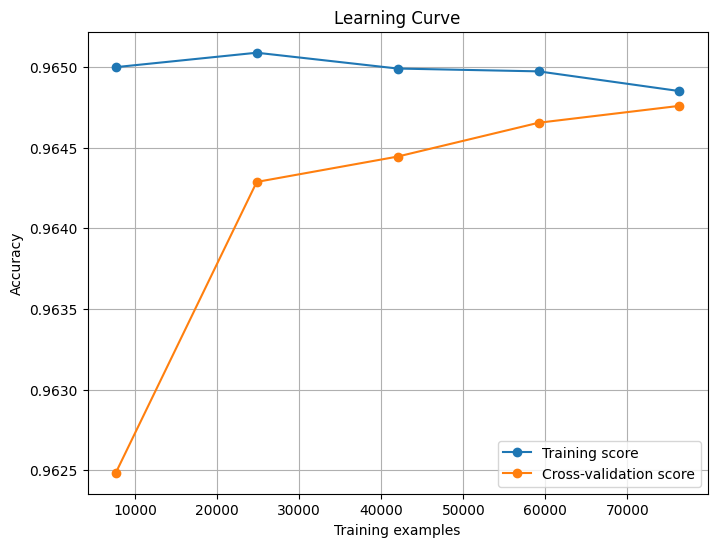

In [72]:
plot_learning_curve(LogisticRegression(max_iter=1000),  X_train, y_train)

* Good fit

# Interpretability

In [73]:
def interpret_coefficients(model, feature_names):
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_[0],
        'Odds Ratio': np.exp(model.coef_[0])
    }).sort_values(by='Odds Ratio', ascending=False)

    # print(coef_df)
    return coef_df

interpret_coefficients(model, X_train.columns)

                 Feature  Coefficient   Odds Ratio
1        total_rec_prncp     7.268485  1434.375896
9          out_prncp_inv     7.197135  1335.599048
3              out_prncp     7.196306  1334.492109
10           total_pymnt     5.077561   160.382333
5   last_fico_range_high     2.711841    15.056966
2        last_pymnt_amnt     2.571787    13.089189
16            revol_util     0.290558     1.337174
0           last_pymnt_d     0.152032     1.164197
19            annual_inc     0.085231     1.088968
18              all_util     0.024175     1.024469
17                   dti    -0.137155     0.871835
15  mo_sin_old_rev_tl_op    -0.201166     0.817777
4     total_rec_late_fee    -0.452981     0.635730
6            installment    -0.636074     0.529367
8          total_rec_int    -1.569718     0.208104
12            recoveries    -3.939588     0.019456
14         hardship_flag    -4.824367     0.008032
13  debt_settlement_flag    -5.392246     0.004552
11       funded_amnt_inv    -9.

,Feature,Coefficient,Odds Ratio
1,total_rec_prncp,7.268485,1434.375896
9,out_prncp_inv,7.197135,1335.599048
3,out_prncp,7.196306,1334.492109
10,total_pymnt,5.077561,160.382333
5,last_fico_range_high,2.711841,15.056966
2,last_pymnt_amnt,2.571787,13.089189
16,revol_util,0.290558,1.337174
0,last_pymnt_d,0.152032,1.164197
19,annual_inc,0.085231,1.088968
18,all_util,0.024175,1.024469


* coefficients:
  * Large coefficients (positive or negative) = high influence.
  * Small coefficients ≈ 0 = low influence.
* Odds Ratio:
  * Odds Ratio >> 1: Feature strongly increases the chance of positive outcome.
  * Odds Ratio << 1: Feature strongly decreases the chance (increases risk).
  * Odds Ratio ≈ 1: Not much impact.